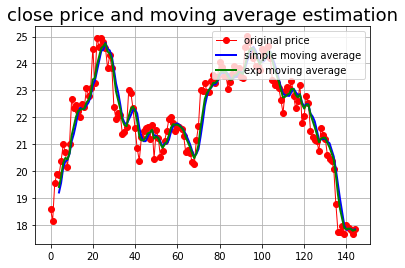

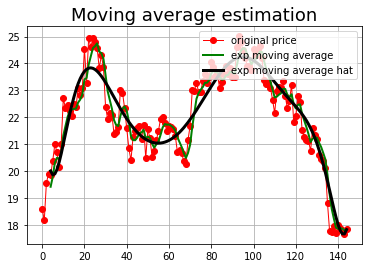

In [35]:
# 一维卷积
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc


data = pd.read_csv("price.csv", encoding="gbk")[["tradeDate", "openPrice", "highestPrice", "lowestPrice", "closePrice", "turnoverVol"]]
# highestPrice, lowestPrice, closePrice, turnoverVol

N = data.shape[0]
closePrice = data["closePrice"]
# 求5日均线
n = 5

# 简单滑动平均
weight = np.ones(n)
weight /= weight.sum()
stock_sma = np.convolve(closePrice, weight, mode="valid")

# 指数滑动平均
weight = np.linspace(1, 0, n)
weight = np.exp(weight)
weight /= weight.sum()
stock_ema = np.convolve(closePrice, weight, mode="valid")

# 指数滑动平均的估计
t = np.arange(n-1, N)
ploy = np.polyfit(t, stock_ema, 10) # Least squares polynomial fit.
stock_ema_hat = np.polyval(ploy, t) # Evaluate a polynomial at specific values.


# 绘图：简单滑动平均，指数滑动平均
plt.figure()
plt.plot(np.arange(N), closePrice, 'ro-', linewidth=1, label='original price')
plt.plot(t, stock_sma, 'b-', linewidth=2, label="simple moving average")
plt.plot(t, stock_ema, 'g-', linewidth=2, label="exp moving average")
plt.legend(loc="upper right")
plt.title("close price and moving average estimation", fontsize=18)
plt.grid(True)
plt.show()


# 绘图：指数滑动平均，指数滑动平均的估计值
plt.figure()
plt.plot(np.arange(N), closePrice, 'ro-', linewidth=1, label='original price')
plt.plot(t, stock_ema, 'g-', linewidth=2, label="exp moving average")
plt.plot(t, stock_ema_hat, 'k-', linewidth=3, label="exp moving average hat")
plt.legend(loc="upper right")
plt.title("Moving average estimation", fontsize=18)
plt.grid(True)
plt.show()



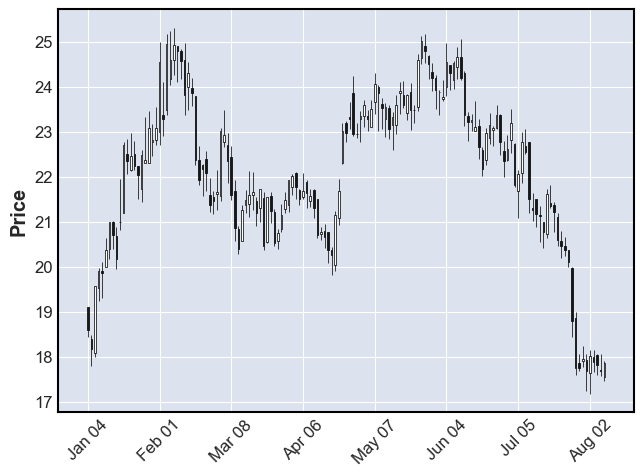

In [59]:
# 绘图：K线图
import mplfinance as mpf

data = pd.read_csv("price.csv", encoding="gbk")[["tradeDate", "openPrice", "highestPrice", "lowestPrice", "closePrice", "turnoverVol"]]
data['tradeDate'] = pd.to_datetime(data['tradeDate'])

name_map = {'tradeDate':'Date', 'openPrice':'Open', 'highestPrice':'High', 'lowestPrice':'Low',
            'closePrice':'Close', 'turnoverVol':'Volume'}
data.rename(columns=name_map, inplace = True)
data.set_index(["Date"], inplace=True)
mpf.plot(data, type='candle')